In [1]:
import math
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
sns.set()
#%matplotlib inline
#from scipy.stats import skew 

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

https://stackoverflow.com/questions/53648208/rename-the-less-frequent-categories-by-other-python

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/

http://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe

https://seaborn.pydata.org/examples/many_pairwise_correlations.html

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

## Data Source:

My project and data is taken from a housing prediction competition on kaggle:
<br>https://www.kaggle.com/c/house-prices-advanced-regression-techniques</br>

## Exploratory Data Analysis and Data Manipulation:

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There seems to be a useless column called 'Id' which is just the row number of the data. Also this data set contains the dependent/target variable as the last column. First I drop the 'Id' column and separate the denpendent and independent variables to X and y, respectively.

In [6]:
train = train.drop('Id', axis=1)

In [7]:
X = train[train.columns[:-1]]
y = train[train.columns[-1]]

In [8]:
obj_cols = X.select_dtypes(include=['object']).columns
obj_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

There seems to be quite a few categorical columns (object), before looking at correlation between the dependent and independent variables, I will clean and manipulate the data so I can better understand the relationships. Below I am creating a dictionary of {'column name' : unique category count} to check the number of categories per categorical column.

In [9]:
unique_cat = {}
for col in obj_cols:
    unique_cat[col] = (len(X[col].unique()))

unique_cat

{'MSZoning': 5,
 'Street': 2,
 'Alley': 3,
 'LotShape': 4,
 'LandContour': 4,
 'Utilities': 2,
 'LotConfig': 5,
 'LandSlope': 3,
 'Neighborhood': 25,
 'Condition1': 9,
 'Condition2': 8,
 'BldgType': 5,
 'HouseStyle': 8,
 'RoofStyle': 6,
 'RoofMatl': 8,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'MasVnrType': 5,
 'ExterQual': 4,
 'ExterCond': 5,
 'Foundation': 6,
 'BsmtQual': 5,
 'BsmtCond': 5,
 'BsmtExposure': 5,
 'BsmtFinType1': 7,
 'BsmtFinType2': 7,
 'Heating': 6,
 'HeatingQC': 5,
 'CentralAir': 2,
 'Electrical': 6,
 'KitchenQual': 4,
 'Functional': 7,
 'FireplaceQu': 6,
 'GarageType': 7,
 'GarageFinish': 4,
 'GarageQual': 6,
 'GarageCond': 6,
 'PavedDrive': 3,
 'PoolQC': 4,
 'Fence': 5,
 'MiscFeature': 5,
 'SaleType': 9,
 'SaleCondition': 6}

Certain categorical columns seem to have a very large number of categories. Below I called value_counts() on Neighbordhood column which has the highest number of categories to see the distribution of the counts. A bar plot of the counts is showed below that.

In [10]:
X['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

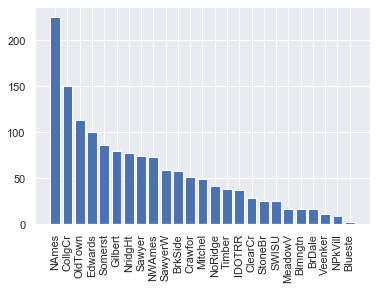

In [11]:
plt.bar(X['Neighborhood'].value_counts().index, X['Neighborhood'].value_counts())
plt.xticks(rotation=90);

There seem to be categories that do not have that many instances and compared to the categories with high instances, they are too small and most likely will not contribute much information to the learning algorithm (highest category is more than 100 times the lowest). Therefore I will combine the lowest 20% of categories into a single category called 'OTHER' for all the categorical columns.

In [12]:
for col in obj_cols:
    sum = 0
    i = 0
    
    for value in X[col].value_counts(normalize=True).values:
        sum += value
        i += 1
        if (sum > 0.8):
            break
        
    keep = X[col].value_counts().index[:i]
    X[col] = np.where(X[col].isin(keep), X[col], 'OTHER')
    

/Users/Francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Below is the result of combining low instance categories into a single category.

In [13]:
X['Neighborhood'].value_counts()

OTHER      266
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
Name: Neighborhood, dtype: int64

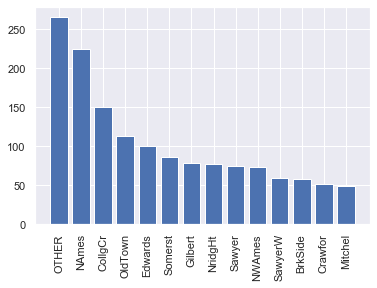

In [14]:
plt.bar(X['Neighborhood'].value_counts().index, X['Neighborhood'].value_counts())
plt.xticks(rotation=90);

Checking for missing values:

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(X.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

There are 3 columns with missing values: LotFrontage, MasVnrArea, GarageYrBlt. These are all numerical columns so I will fill them with their respective median values.

In [16]:
X['LotFrontage'].fillna(X['LotFrontage'].median(), inplace=True)
X['MasVnrArea'].fillna(X['MasVnrArea'].median(), inplace=True)
X['GarageYrBlt'].fillna(X['GarageYrBlt'].median(), inplace=True)

/Users/Francis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Next I will use one-hot encoding to create dummy varialbe for the categorical columns. The reason I am doing this now even though the statsmodel ordinary least squares function automatically creates dummy variables for you is because of the automatic feature selection methods I will use later require all columns to be numeric. Also, this is why I did not change the object columns to categories at the beginning. Aferwards I will drop the original object columns. Also the MSSubClass column type is set as 'int64' but the actual column type is categorical. Therefore that column will also be replace by dummy columns formed from its categories.

In [17]:
for col in obj_cols:
    X = pd.concat([X,pd.get_dummies(X[col], prefix=col)],axis=1)
    
X = pd.concat([X,pd.get_dummies(X['MSSubClass'], prefix='MSSubClass')],axis=1)

In [18]:
X.drop(obj_cols, axis=1, inplace=True)
X.drop(['MSSubClass'], axis=1, inplace=True)

There are 3 columns, namely the column names that cause somme problems later because either, the column name begins with a number, or there is a space between the column name. I will change the names of these columns below.

In [19]:
X = X.rename(columns={'1stFlrSF': 'FirstFlrSF'})
X = X.rename(columns={'2ndFlrSF': 'SecondFlrSF'})
X = X.rename(columns={'3SsnPorch': 'ThreeSsnPorch'})
X = X.rename(columns={'Exterior1st_Wd Sdng': 'Exterior1st_Wd'})
X = X.rename(columns={'Exterior2nd_Wd Sdng': 'Exterior2nd_Wd'})

Below is the final data frame.

In [20]:
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_OTHER,MSZoning_RL,MSZoning_RM,Street_OTHER,Street_Pave,Alley_Grvl,Alley_OTHER,Alley_Pave,LotShape_IR1,LotShape_OTHER,LotShape_Reg,LandContour_Lvl,LandContour_OTHER,Utilities_AllPub,Utilities_OTHER,LotConfig_Corner,LotConfig_Inside,LotConfig_OTHER,LandSlope_Gtl,LandSlope_OTHER,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OTHER,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Norm,Condition1_OTHER,Condition2_Norm,Condition2_OTHER,BldgType_1Fam,BldgType_OTHER,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_OTHER,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_OTHER,RoofMatl_CompShg,RoofMatl_OTHER,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_OTHER,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_OTHER,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_OTHER,ExterQual_Gd,ExterQual_OTHER,ExterQual_TA,ExterCond_OTHER,ExterCond_TA,Foundation_CBlock,Foundation_OTHER,Foundation_PConc,BsmtQual_Gd,BsmtQual_OTHER,BsmtQual_TA,BsmtCond_OTHER,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_No,BsmtExposure_OTHER,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_OTHER,BsmtFinType1_Unf,BsmtFinType2_OTHER,BsmtFinType2_Unf,Heating_GasA,Heating_OTHER,HeatingQC_Ex,HeatingQC_OTHER,HeatingQC_TA,CentralAir_OTHER,CentralAir_Y,Electrical_OTHER,Electrical_SBrkr,KitchenQual_Gd,KitchenQual_OTHER,KitchenQual_TA,Functional_OTHER,Functional_Typ,FireplaceQu_Gd,FireplaceQu_OTHER,FireplaceQu_TA,GarageType_Attchd,GarageType_Detchd,GarageType_OTHER,GarageFinish_Fin,GarageFinish_OTHER,GarageFinish_RFn,GarageFinish_Unf,GarageQual_OTHER,GarageQual_TA,GarageCond_OTHER,GarageCond_TA,PavedDrive_OTHER,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_OTHER,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_OTHER,MiscFeature_OTHER,MiscFeature_Shed,SaleType_OTHER,SaleType_WD,SaleCondition_Normal,SaleCondition_OTHER,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998

## Feature Selection and Model Training

The data manipulation process above create lots of new dummy variables and undoubtedly some of them will be highly correlated and only contribute redudant information. Therefore below I drop all features that have more than 0.5 correlation with each other. 

In [21]:
corr_features = set()
corr_matrix = X.corr()
count = 0
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            col = corr_matrix.columns[i]
            corr_features.add(col)

In [22]:
features = list(corr_features)
X = X.drop(features, axis=1)
print('Dropped features: %d' %len(corr_features))

Dropped features: 88


Below I created a new df by joining the updated X and y to visualize at the correlations of the new dataframe with manipulated independent variables and the dependent variable. I took the top 25 correlated features with the dependent variable in absolute value and created a correlation plot. 

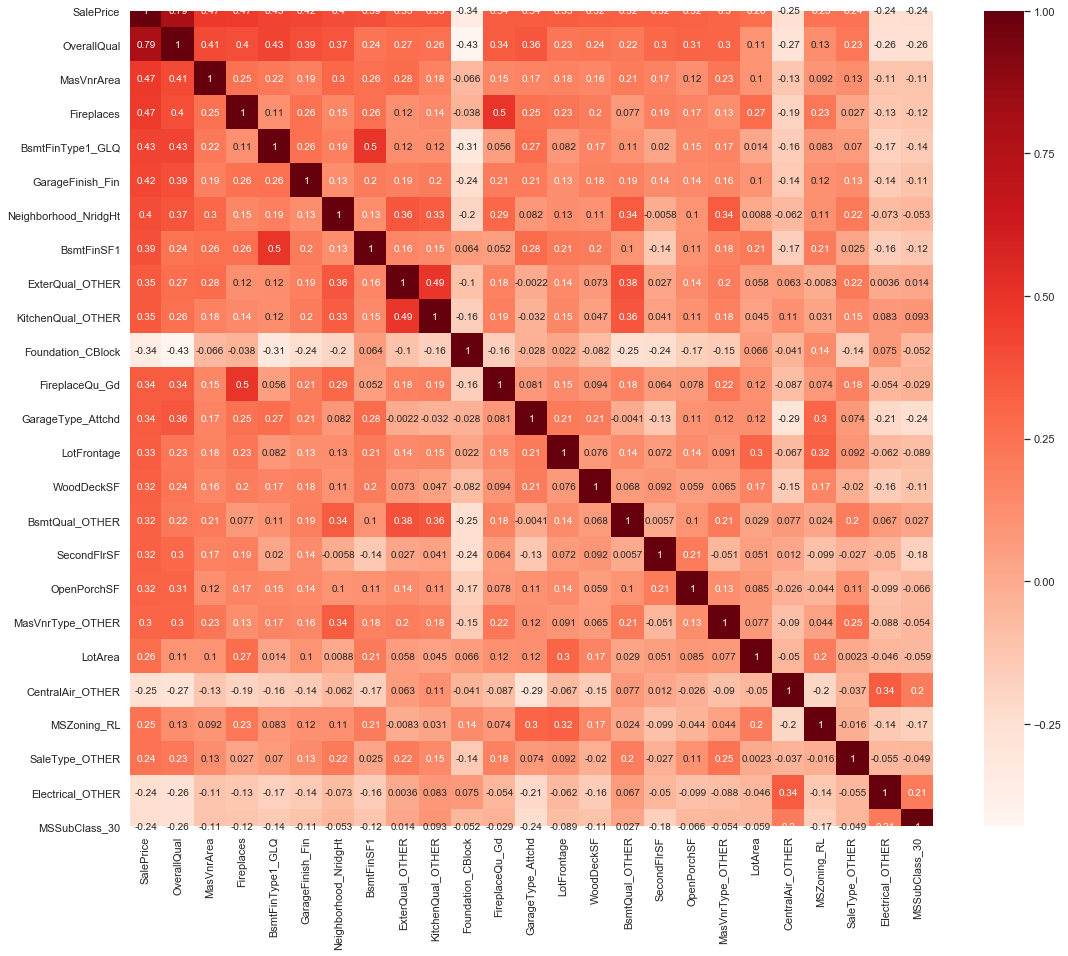

In [23]:
new_df = X.join(y)
corr = new_df.corr()
top_features = abs(corr['SalePrice']).sort_values(ascending=False)[:25]
top_corr = new_df[top_features.index].corr()
plt.figure(figsize=(18,15))
sns.heatmap(top_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
X_topcorr = X[top_features.index[1:]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_topcorr, y, test_size=0.4, random_state=0)
model1 = LinearRegression().fit(X_train1, y_train1)
y_hat1 = model1.predict(X_test1)
print('Score: ', model1.score(X_test1, y_test1))

Score:  0.7275460095111762


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_topcorr, y, test_size=0.4, random_state=0)
model1 = LinearRegression().fit(X_train1, y_train1)
y_hat1 = model1.predict(X_test1)
print('Score: ', model1.score(X_test1, y_test1))

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_hat1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_hat1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_hat1)))

Mean Absolute Error: 24810.605995639937
Mean Squared Error: 1697319250.0993702
Root Mean Squared Error: 41198.53456252261


In [26]:
y_test1.mean()

178801.33047945207

Selecting features based on a simple method of choosing variables with the highest correlation with the dependent variable. resulted in a RMSE of 41,198. This seems quite high given that average home price for the test set was 178,801.

Below is the results from using the LassoCV method to select features. The score and RMSE are worse than the method of choosing simple the least correlated features.

In [27]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(X, y)
coef = pd.Series(lasso.coef_, index = X.columns)
X_lasso = X[coef.sort_values(ascending=False).nlargest(50).index]

/Users/Francis/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_lasso, y, test_size=0.4, random_state=0)
model2 = LinearRegression().fit(X_train2, y_train2)
y_hat2 = model2.predict(X_test2)
print('Score: ', model2.score(X_test2, y_test2))

Score:  0.7045740305454565


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_hat2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_hat2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_hat2)))

Mean Absolute Error: 25309.054535827636
Mean Squared Error: 1840428851.9864209
Root Mean Squared Error: 42900.21971955879


Below is a ensemble method using the ExtraTreesClassifier, I got this from one of the references above and was trying to see if another method might be able to get a better score and prediction. The scores and RMSE did not improve and is pretty much around the same.

/Users/Francis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


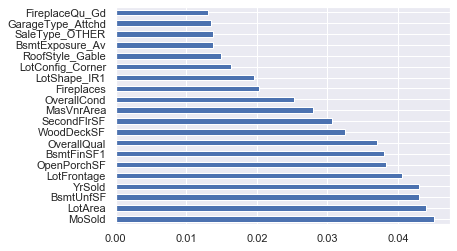

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
model3 = ExtraTreesClassifier()
model3.fit(X,y)
feat_importances = pd.Series(model3.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [31]:
X_topimport = X[feat_importances.nlargest(50).index]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_topimport, y, test_size=0.4, random_state=0)
model3 = LinearRegression().fit(X_train3, y_train3)
y_hat3 = model3.predict(X_test3)
print('Score: ', model3.score(X_test3, y_test3))

Score:  0.7315947921219335


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test3, y_hat3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test3, y_hat3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, y_hat3)))

Mean Absolute Error: 22981.450952388914
Mean Squared Error: 1672096361.4480562
Root Mean Squared Error: 40891.27488166707


Below I ran 1000 iterations of random samples to visualize the variance of the model using all of the featurs. It seems model score is highly skewed to the left and most of the values falling the 0.6 to 0.8 range. Below that is the distribution of the RMSE and that seems more symmetric than the scores. Most of the values fall in the 30,000 to 50,000 range.

In [33]:
score = []
rmse = []
for i in range(1000):
    X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.4)
    model4 = LinearRegression().fit(X_train4, y_train4)
    y_hat4 = model4.predict(X_test4)
    score.append(model4.score(X_test4, y_test4))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test4, y_hat4)))
    

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test4, y_hat4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test4, y_hat4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test4, y_hat4)))

Mean Absolute Error: 23823.887837566985
Mean Squared Error: 1432284938.1491776
Root Mean Squared Error: 37845.54053186686


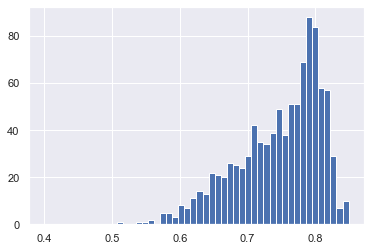

In [35]:
plt.hist(score, bins=50, range=(0.4,max(score)));

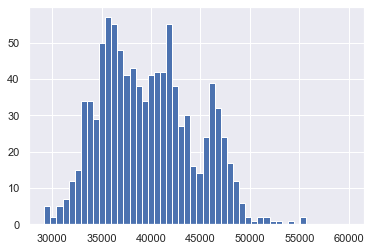

In [36]:
plt.hist(rmse, bins=50, range=(min(rmse), 60000));